# Random Forest

In [1]:

import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/pp-ML/

/content/drive/My Drive/pp-ML


In [33]:
df = pd.read_csv("loan_balanceado.csv", index_col= 0)
df.head()

,dependents,education,self_employed,loan_amount_term,credit_history,applicantincome,coapplicantincome,loanamount,gender_Female,gender_Male,married_No,married_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban,loan_status
0,3,2,2,3,1,0.311983,-0.613757,-0.181121,0,1,1,0,0,0,1,1
1,2,2,2,3,1,-0.079844,-0.025836,-0.181121,0,1,0,1,1,0,0,0
2,3,2,1,3,1,-0.569782,-0.613757,-1.021461,0,1,0,1,0,0,1,1
3,3,1,2,3,1,-0.698843,0.305552,-0.289552,0,1,0,1,0,0,1,1
4,3,2,2,3,1,0.358718,-0.613757,-0.004921,0,1,1,0,0,0,1,1


In [34]:
df_metricas = pd.read_csv("metricas_loan_LR_DT.csv", index_col= 0)
df_metricas.head()

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.702899,0.662500,0.791045,0.721088,0.408530,test,Regresión logistica estandar
1,0.743636,0.703593,0.848375,0.769231,0.486471,train,Regresión logistica estandar
2,0.811594,0.859649,0.731343,0.790323,0.621279,test,Decission Tree I
3,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I
4,0.855072,0.885246,0.805970,0.843750,0.709168,test,Decision Tree II


In [35]:
X1 = df.drop("loan_status", axis = 1)
y1 = df["loan_status"]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [37]:
param = {"max_depth": [8, 10, 12, 14, 16],
        "max_features": [1,2,3,4],
        "min_samples_split": [1,3, 5, 8],
        "min_samples_leaf": [1,3, 5, 8]} 

In [38]:

gs = GridSearchCV(
            estimator=RandomForestClassifier(random_state= 42),
            param_grid= param, 
            cv=10, 
            verbose=-1) 

In [39]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [8, 10, 12, 14, 16],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 3, 5, 8],
                         'min_samples_split': [1, 3, 5, 8]},
             verbose=-1)

In [40]:
bosque = gs.best_estimator_
bosque

RandomForestClassifier(max_depth=12, max_features=3, min_samples_split=3,
                       random_state=42)

In [44]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [45]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [46]:
dt_results = metricas(y_test, y_pred_test_rf,y_train,  y_pred_train_rf, "Random Forest")
dt_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.840580,0.826087,0.850746,0.838235,0.681159,test,Random Forest
1,0.990909,0.982270,1.000000,0.991055,0.981815,train,Random Forest


Aunque seguimos teniendo un ligero overfitting, vemos que nuestro kappa puede considerarse como bueno y el valor del recall es más alto que el de precision, cosa que no nos interesa para nuestro modelo, puesto que nos interesa que, en caso de error, sean los FN los que aumenten.

In [47]:
df_todos_resultados = pd.concat([dt_results, df_metricas], axis = 0)
df_todos_resultados

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.840580,0.826087,0.850746,0.838235,0.681159,test,Random Forest
1,0.990909,0.982270,1.000000,0.991055,0.981815,train,Random Forest
0,0.702899,0.662500,0.791045,0.721088,0.408530,test,Regresión logistica estandar
1,0.743636,0.703593,0.848375,0.769231,0.486471,train,Regresión logistica estandar
2,0.811594,0.859649,0.731343,0.790323,0.621279,test,Decission Tree I
3,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I
4,0.855072,0.885246,0.805970,0.843750,0.709168,test,Decision Tree II
5,0.981818,1.000000,0.963899,0.981618,0.963644,train,Decision Tree II


In [48]:
df_todos_resultados.to_csv("metricas_modelos_completos.csv")


Después de comparar los cuatro modelos, consideramos que el más acertado para nuestras necesidades es el modelo del decision Tree II a pesar de tener un ligero overfitting.

In [49]:

importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

importancia_predictores

,predictor,importancia
7,loanamount,0.202720
4,credit_history,0.202690
5,applicantincome,0.200838
6,coapplicantincome,0.136090
0,dependents,0.042422
1,education,0.033965
13,property_area_Semiurban,0.028789
2,self_employed,0.026306
3,loan_amount_term,0.026012
10,married_No,0.020176


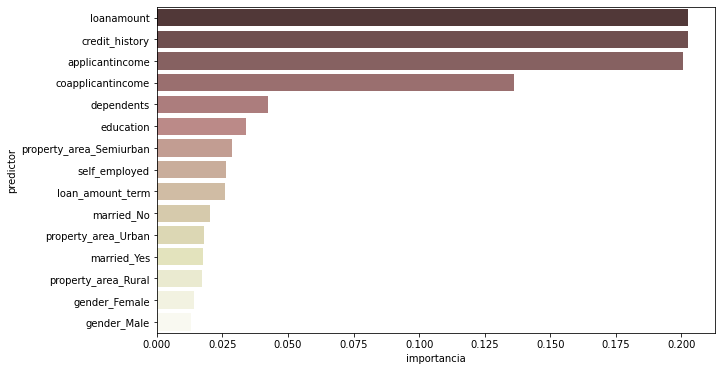

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="pink");
plt.show()

En comparación con el Decision Tree II, el Random Forest tiene más en cuenta el *credit_history* que los ingresos del solicitante y el coapplicant.